In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns

In [68]:
data = pd.read_csv('CC2020_train_final.csv')

In [69]:
data.head(3)

,YEAR,LOCATION,INBRED,INBRED_CLUSTER,TESTER,TESTER_CLUSTER,YIELD
0,18,Loc 5608,Inbred_142,Cluster11,Tester_740,Cluster10,1.135462
1,18,Loc 4533,Inbred_142,Cluster11,Tester_740,Cluster10,1.139813
2,18,Loc 5620,Inbred_142,Cluster11,Tester_740,Cluster10,1.117778


In [5]:
X = data.drop(['YEAR', 'LOCATION'], axis=1)

In [6]:
clean_data = X.groupby(['INBRED', 'INBRED_CLUSTER','TESTER', 'TESTER_CLUSTER' ],as_index=False).mean()

In [46]:
data.head(3)

,YEAR,LOCATION,INBRED,INBRED_CLUSTER,TESTER,TESTER_CLUSTER,YIELD
0,18,Loc 5608,Inbred_142,Cluster11,Tester_740,Cluster10,1.135462
1,18,Loc 4533,Inbred_142,Cluster11,Tester_740,Cluster10,1.139813
2,18,Loc 5620,Inbred_142,Cluster11,Tester_740,Cluster10,1.117778


In [71]:
X = data.drop(['YEAR'], axis=1)

In [72]:
clean_data = X.groupby(['LOCATION','INBRED', 'INBRED_CLUSTER','TESTER', 'TESTER_CLUSTER' ],as_index=False).mean()

In [73]:
C =clean_data.drop(['LOCATION'], axis=1)

In [74]:
k = C.groupby(['INBRED', 'INBRED_CLUSTER','TESTER', 'TESTER_CLUSTER' ],as_index=False).agg(np.std, ddof=1)

In [75]:
k.head(5)

,INBRED,INBRED_CLUSTER,TESTER,TESTER_CLUSTER,YIELD
0,Inbred_1071,Cluster8,Tester_1345,Cluster1,0.128227
1,Inbred_1071,Cluster8,Tester_4373,Cluster3,0.088839
2,Inbred_1071,Cluster8,Tester_4473,Cluster5,0.103460
3,Inbred_1071,Cluster8,Tester_4541,Cluster4,0.046778
4,Inbred_1071,Cluster8,Tester_5305,Cluster4,0.085139


In [76]:
k['YIELD'].min()

0.018840189795044933

In [77]:
k['YIELD'].max()

0.31295209083348685

In [78]:
k['YIELD'].mean()

0.09661158430053135

In [16]:
data['YIELD'].max()

1.8000826730000001

In [13]:
data['YIELD'].min()

0.047235945

In [44]:
data['YIELD'].mean()

1.0017310308815448

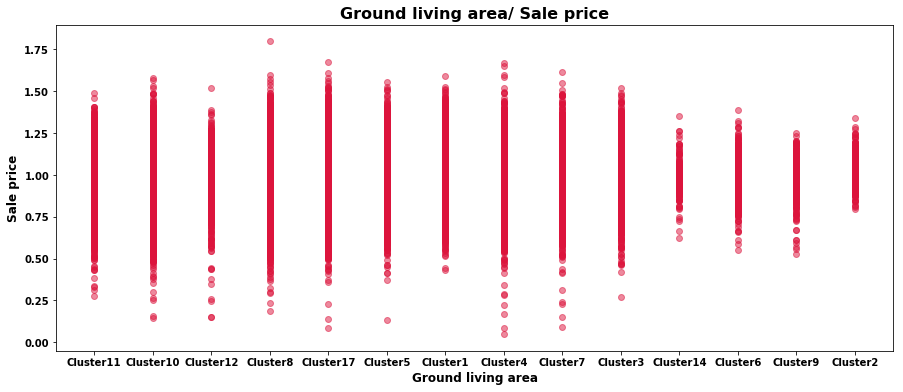

In [8]:
plt.figure(figsize=(15,6))
plt.scatter(x=data['INBRED_CLUSTER'], y=data['YIELD'], color='crimson', alpha=0.5)
plt.title('Ground living area/ Sale price', weight='bold', fontsize=16)
plt.xlabel('Ground living area', weight='bold', fontsize=12)
plt.ylabel('Sale price', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

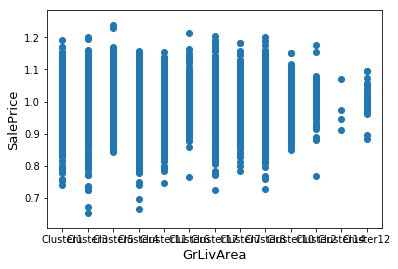

In [14]:
fig, ax = plt.subplots()
ax.scatter(x = clean_data['TESTER_CLUSTER'], y = clean_data['YIELD'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [9]:
std = X.groupby(['INBRED', 'INBRED_CLUSTER','TESTER', 'TESTER_CLUSTER' ],as_index=False).agg(np.std, ddof=1)

In [21]:
std.rename(columns={"YIELD": "STD_YIELD"})

,INBRED,INBRED_CLUSTER,TESTER,TESTER_CLUSTER,STD_YIELD
0,Inbred_1071,Cluster8,Tester_1345,Cluster1,0.128227
1,Inbred_1071,Cluster8,Tester_4373,Cluster3,0.092430
2,Inbred_1071,Cluster8,Tester_4473,Cluster5,0.103460
3,Inbred_1071,Cluster8,Tester_4541,Cluster4,0.046778
4,Inbred_1071,Cluster8,Tester_5305,Cluster4,0.088751
5,Inbred_1071,Cluster8,Tester_5421,Cluster3,0.103803
6,Inbred_1071,Cluster8,Tester_5435,Cluster1,0.100231
7,Inbred_1071,Cluster8,Tester_5483,Cluster1,0.107815
8,Inbred_1071,Cluster8,Tester_5495,Cluster5,0.089075
9,Inbred_1071,Cluster8,Tester_5573,Cluster1,0.149661


In [23]:
std['YIELD'].max()

0.31295209083348685

In [24]:
std['YIELD'].min()

0.018840189795044933

In [43]:
std['YIELD'].mean()

0.09836586842927644

In [25]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [32]:
s = X.groupby(['INBRED', 'INBRED_CLUSTER','TESTER', 'TESTER_CLUSTER' ],as_index=False).agg(np., ddof=1)

199476

In [32]:
X['pandas_SMA_3'] = X['YIELD'].rolling(window=2).mean()

In [40]:
p = X.groupby(['INBRED', 'INBRED_CLUSTER','TESTER', 'TESTER_CLUSTER' ],as_index=False).rolling(window=2)['YIELD'].mean()

In [42]:
X.groupby(['INBRED', 'INBRED_CLUSTER','TESTER', 'TESTER_CLUSTER' ],as_index=False).mean()

,INBRED,INBRED_CLUSTER,TESTER,TESTER_CLUSTER,YIELD,pandas_SMA_3
0,Inbred_1071,Cluster8,Tester_1345,Cluster1,0.986544,1.001694
1,Inbred_1071,Cluster8,Tester_4373,Cluster3,1.057704,1.034668
2,Inbred_1071,Cluster8,Tester_4473,Cluster5,1.023704,1.036542
3,Inbred_1071,Cluster8,Tester_4541,Cluster4,1.014735,1.020240
4,Inbred_1071,Cluster8,Tester_5305,Cluster4,1.062727,1.046608
5,Inbred_1071,Cluster8,Tester_5421,Cluster3,1.064358,1.021137
6,Inbred_1071,Cluster8,Tester_5435,Cluster1,0.995960,0.989147
7,Inbred_1071,Cluster8,Tester_5483,Cluster1,1.029057,1.027120
8,Inbred_1071,Cluster8,Tester_5495,Cluster5,0.953720,0.983510
9,Inbred_1071,Cluster8,Tester_5573,Cluster1,1.043803,1.022316


In [41]:
X.head(5)

,INBRED,INBRED_CLUSTER,TESTER,TESTER_CLUSTER,YIELD,pandas_SMA_3
0,Inbred_142,Cluster11,Tester_740,Cluster10,1.135462,NaN
1,Inbred_142,Cluster11,Tester_740,Cluster10,1.139813,1.137637
2,Inbred_142,Cluster11,Tester_740,Cluster10,1.117778,1.128795
3,Inbred_142,Cluster11,Tester_740,Cluster10,1.171366,1.144572
4,Inbred_142,Cluster11,Tester_740,Cluster10,1.059364,1.115365


In [38]:
p

0      1766           NaN
       1767      1.033521
       1774      1.071877
       1781      1.107004
       1783      1.043922
       1787      0.788301
       1790      0.806218
       1798      1.010671
       1808      1.007506
       1812      1.004852
       1816      1.012540
       1819      0.974913
1      76214          NaN
       76276     1.099033
       76325     1.050653
       76411     0.963561
       76687     1.120178
       76752     1.233420
       76760     1.086150
       76896     1.022071
       76901     1.056188
       77227     1.112458
       77283     1.127279
       77464     0.960091
       77648     0.968624
       77809     1.039150
       77831     1.024433
       78225     1.084154
       78376     1.097022
       78704     1.043183
                   ...   
10915  102995    1.133652
       103115    1.080934
       103353    1.071596
       104063    1.139264
       104065    1.172415
       104152    1.202163
       104751    1.181451
10916  12724

In [34]:
X.head(20)

,INBRED,INBRED_CLUSTER,TESTER,TESTER_CLUSTER,YIELD,pandas_SMA_3
0,Inbred_142,Cluster11,Tester_740,Cluster10,1.135462,NaN
1,Inbred_142,Cluster11,Tester_740,Cluster10,1.139813,1.137637
2,Inbred_142,Cluster11,Tester_740,Cluster10,1.117778,1.128795
3,Inbred_142,Cluster11,Tester_740,Cluster10,1.171366,1.144572
4,Inbred_142,Cluster11,Tester_740,Cluster10,1.059364,1.115365
5,Inbred_142,Cluster11,Tester_740,Cluster10,1.040588,1.049976
6,Inbred_142,Cluster11,Tester_740,Cluster10,1.002265,1.021427
7,Inbred_142,Cluster11,Tester_740,Cluster10,0.971066,0.986666
8,Inbred_142,Cluster11,Tester_743,Cluster10,1.289008,1.130037
9,Inbred_142,Cluster11,Tester_743,Cluster10,0.960433,1.124720


In [35]:
clean_data.head(5)

,INBRED,INBRED_CLUSTER,TESTER,TESTER_CLUSTER,YIELD
0,Inbred_1071,Cluster8,Tester_1345,Cluster1,0.128227
1,Inbred_1071,Cluster8,Tester_4373,Cluster3,0.092430
2,Inbred_1071,Cluster8,Tester_4473,Cluster5,0.103460
3,Inbred_1071,Cluster8,Tester_4541,Cluster4,0.046778
4,Inbred_1071,Cluster8,Tester_5305,Cluster4,0.088751


In [45]:
len(clean_data)

10919

In [46]:
y = clean_data.YIELD

In [47]:
data = clean_data.drop(['YIELD'], axis=1)

In [48]:
data.head(5)

,INBRED,INBRED_CLUSTER,TESTER,TESTER_CLUSTER
0,Inbred_1071,Cluster8,Tester_1345,Cluster1
1,Inbred_1071,Cluster8,Tester_4373,Cluster3
2,Inbred_1071,Cluster8,Tester_4473,Cluster5
3,Inbred_1071,Cluster8,Tester_4541,Cluster4
4,Inbred_1071,Cluster8,Tester_5305,Cluster4


In [49]:
X = data

In [53]:
label_enc = preprocessing.LabelEncoder()

In [54]:
X['INBRED'] = label_enc.fit_transform(X['INBRED'])
X['INBRED_CLUSTER'] = label_enc.fit_transform(X['INBRED_CLUSTER'])
X['TESTER'] = label_enc.fit_transform(X['TESTER'])
X['TESTER_CLUSTER'] = label_enc.fit_transform(X['TESTER_CLUSTER'])

In [55]:
X.head(3)

,INBRED,INBRED_CLUSTER,TESTER,TESTER_CLUSTER
0,0,12,0,0
1,0,12,125,7
2,0,12,136,9


In [62]:
#notice how these are all same.. number varies within same location or year

In [56]:
enc = preprocessing.OneHotEncoder()

In [59]:
X = enc.fit_transform(X)

#Classifiers

In [63]:
scores = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=np.random)
    my_model = LinearRegression()
    my_model.fit(X_train, y_train)
    predictions = my_model.predict(X_test)
    score = mean_absolute_error(predictions, y_test)
    scores.append(score)

    
print('Total CV MSE is {}'.format(np.mean(scores)))
print('Total STD is {}'.format(np.std(scores)))

Total CV MSE is 0.04052792714685675
Total STD is 0.0005040665268159135


In [64]:
scores = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=np.random)
    my_model = RandomForestRegressor()
    my_model.fit(X_train, y_train)
    predictions = my_model.predict(X_test)
    score = mean_absolute_error(predictions, y_test)
    scores.append(score)

    
print('Total CV MSE is {}'.format(np.mean(scores)))
print('Total STD is {}'.format(np.std(scores)))

Total CV MSE is 0.041465551269499974
Total STD is 0.0006224038111828759


In [65]:
#GradientBoosting Basic

In [66]:
scores = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=np.random)
    my_model = GradientBoostingRegressor()
    my_model.fit(X_train, y_train)
    predictions = my_model.predict(X_test)
    score = mean_absolute_error(predictions, y_test)
    scores.append(score)

    
print('Total CV MSE is {}'.format(np.mean(scores)))
print('Total STD is {}'.format(np.std(scores)))

Total CV MSE is 0.043346825996887425
Total STD is 0.0004168708507106904


In [67]:
scores = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=np.random)
    my_model = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
    my_model.fit(X_train, y_train)
    predictions = my_model.predict(X_test)
    score = mean_absolute_error(predictions, y_test)
    scores.append(score)

    
print('Total CV MSE is {}'.format(np.mean(scores)))
print('Total STD is {}'.format(np.std(scores)))

Total CV MSE is 0.04198032155589927
Total STD is 0.0005893925870361009


In [68]:
scores = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=np.random)
    my_model = AdaBoostRegressor()
    my_model.fit(X_train, y_train)
    predictions = my_model.predict(X_test)
    score = mean_absolute_error(predictions, y_test)
    scores.append(score)

    
print('Total CV MSE is {}'.format(np.mean(scores)))
print('Total STD is {}'.format(np.std(scores)))

Total CV MSE is 0.04571399018439544
Total STD is 0.0005458554686381968


In [69]:
scores = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=np.random)
    my_model = SVR()
    my_model.fit(X_train, y_train)
    predictions = my_model.predict(X_test)
    score = mean_absolute_error(predictions, y_test)
    scores.append(score)

    
print('Total CV MSE is {}'.format(np.mean(scores)))
print('Total STD is {}'.format(np.std(scores)))

Total CV MSE is 0.043676026630022
Total STD is 0.00047569006051023237


In [70]:
scores = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=np.random)
    my_model = ExtraTreesRegressor()
    my_model.fit(X_train, y_train)
    predictions = my_model.predict(X_test)
    score = mean_absolute_error(predictions, y_test)
    scores.append(score)

    
print('Total CV MSE is {}'.format(np.mean(scores)))
print('Total STD is {}'.format(np.std(scores)))

Total CV MSE is 0.049612573152465575
Total STD is 0.0006637614211557034


In [71]:
scores = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=np.random)
    my_model = KNeighborsRegressor()
    my_model.fit(X_train, y_train)
    predictions = my_model.predict(X_test)
    score = mean_absolute_error(predictions, y_test)
    scores.append(score)

    
print('Total CV MSE is {}'.format(np.mean(scores)))
print('Total STD is {}'.format(np.std(scores)))

Total CV MSE is 0.04462829344008896
Total STD is 0.000554613552197185


In [72]:
scores = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=np.random)
    my_model = ElasticNet()
    my_model.fit(X_train, y_train)
    predictions = my_model.predict(X_test)
    score = mean_absolute_error(predictions, y_test)
    scores.append(score)

    
print('Total CV MSE is {}'.format(np.mean(scores)))
print('Total STD is {}'.format(np.std(scores)))

Total CV MSE is 0.044987139492325315
Total STD is 0.0004737877684421808


In [73]:
scores = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=np.random)
    my_model = ElasticNet()
    my_model.fit(X_train, y_train)
    predictions = my_model.predict(X_test)
    score = mean_absolute_error(predictions, y_test)
    scores.append(score)

    
print('Total CV MSE is {}'.format(np.mean(scores)))
print('Total STD is {}'.format(np.std(scores)))

Total CV MSE is 0.04485253650796462
Total STD is 0.0007905346712104585
